In [1]:
from scipy.optimize import newton
from scipy.special import zeta
import scipy as sp
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import powerlaw as pl

In [3]:
data1=pl.power_law(3.01,1000,1000)

In [4]:
fit=pl.Fit_Bayes(data1)

In [5]:
gammas, weights=fit.posterior()

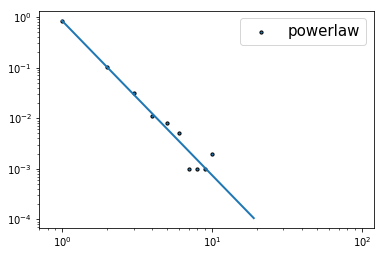

In [7]:
plt.figure()
fit.plot_fit(np.mean(gammas[0]),label='powerlaw')
plt.xlim(0.7,120)
plt.legend(fontsize=15)

In [ ]:
x=fit.gammas

In [ ]:
y=fit.prior_gamma

In [ ]:
y=[fit.Z_jeffrey(i) for i in fit.gammas]

In [ ]:
plt.plot(x,y)

In [ ]:
(sp.stats.uniform(0, 1)).pdf(fit.weight)

In [11]:
range=(1,6)

In [13]:
type(range)

tuple

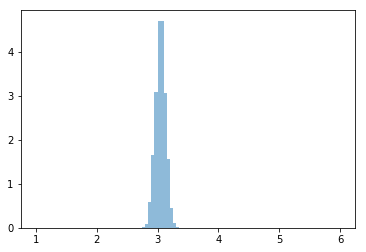

In [10]:
plt.figure()

fit.plot_posterior(gammas[0],range=(1,6))

In [ ]:
unique, counts = np.unique(data1, return_counts=True)
frequency = counts / np.sum(counts)

In [ ]:
def powerlawpdf(self,final_gamma):
    """The power law probability function
    Input: x - array of clone sizes; gamma - desired exponent.
    Output: array of probabilities of each clone size x."""

    xpmax = max(data1)
    xp = np.arange(self.xmin, xpmax)
    yp=(xp**(-final_gamma))

    return xp, yp

In [ ]:
xpmax = max(data1)
xp = np.arange(min(data1), xpmax)
yp=(xp**(-1.01)/8)

In [ ]:
xpmax = max(data1)
xp = np.arange(min(data1), xpmax)
yp_er=(xp**(-0.01)/8)

In [ ]:
yp_er

In [ ]:
error = np.log(np.array([0.01]*len(yp)))

In [ ]:
# plt.loglog(unique,frequency,'o',color=None,label=None,markeredgecolor='black',markersize=6)
plt.xscale('log')
plt.yscale('log')
plt.scatter(unique,frequency,color=None,label=None,edgecolor='black',s=6)
plt.plot(xp,yp)
plt.fill_between(xp, np.log(yp)-np.log(yp_er), np.log(yp)+np.log(yp_er),alpha=0.5,color='gray',interpolate=True)

In [ ]:
fit.plot_fit(1.1,0.1)

In [ ]:
data1=pl.power_law(1.01,1000,100000)
data2=pl.power_law(3.01,1000,100000)
data3=pl.power_law(3.01,1000,100000)
data=np.concatenate((data1,data2),axis=0)

In [ ]:
data_fit=pl.Fit_Bayes(data,mixed=1)

In [ ]:
#1
data_fit.bic

In [ ]:
#2
data_fit.bic

In [ ]:
#3
data_fit.bic

In [ ]:
plt.hist((data_fit.samples_gamma)[0])


In [ ]:
plt.hist((data_fit.samples_gamma)[0])
plt.hist((data_fit.samples_gamma)[1])
plt.hist((data_fit.samples_gamma)[2])

In [ ]:
plt.hist((data_fit.samples_weight)[0])
plt.hist((data_fit.samples_weight)[1])
plt.hist((data_fit.samples_weight)[2])

In [ ]:
def Z(gamma, xmin, xmax, discrete=True):
    """
    The normalization function Z for discrete and continuous powerlaw distributions.
    Input: gamma - a randomly sampled target exponent using MCMC algorithm.
    Output: s - normalization value.
    """
    if discrete==True: #when powerlaw is discrete
        if np.isfinite(xmax): #if xmax is NOT infinity:
            #Calculate zeta from Xmin to Infinity and substract Zeta from Xmax to Infinity
            #To find zeta from Xmin to Xmax.
            s=zeta(gamma,xmin)-zeta(gamma,xmax)
        else:
            #if xmax is infinity, simply calculate zeta from Xmin till infinity.
            s=zeta(gamma,xmin)
    else:
        #calculate normalization function when powerlaw is continuous.
        #s=(xmax^(-gamma+1)/(1-gamma))-(xminx^(-gamma+1)/(1-gamma))
        s = (xmax**(-gamma + 1) / (1 - gamma)) - (xmin**(-gamma + 1) / (1 - gamma))
    return s

def Z_prime(gamma,xmin,xmax,discrete=True):
    h = (1e-8)
    s = (Z(gamma + h,xmin,xmax,discrete=True) - Z(gamma - h,xmin,xmax,discrete=True)) / (2 * h)
    return s

def Z_prime2(gamma,xmin,xmax,discrete=True):
    h = (1e-8)
    s = (Z(gamma + 2*h,xmin,xmax,discrete=True) - 2*Z(gamma,xmin,xmax,discrete=True) + Z(gamma - 2*h,xmin,xmax,discrete=True)) / (4*(h**2))
    return s

def Z_jeffrey(gamma,xmin,xmax,discrete=True):
    z=np.sqrt((Z_prime2(gamma,xmin,xmax,discrete=True))/Z(gamma,xmin,xmax,discrete=True)-Z_prime(gamma,xmin,xmax,discrete=True)**2/Z(gamma,xmin,xmax,discrete=True)**2)
    return z

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime(3,1,1000,discrete=True)

In [ ]:
Z_prime(3,1,1000,discrete=True)

In [ ]:
Z_jeffrey(3,1,1000)

In [ ]:
Z0=Z(3,1,1000)
Z1=Z_prime(3,1,1000)
Z2=Z_prime2(3,1,1000)

In [ ]:
Z2

In [ ]:
(-Z1/Z0)**2+Z2/Z0